# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Contém a coluna 'mau'
df_original = pd.read_csv("demo01.csv")

# DataFrame já processado sem 'mau'
df_final = pd.read_csv("demo01_processado.csv")

In [15]:
# Adicionar a coluna 'mau' ao DataFrame final
df_final['mau'] = df_original['mau']

# Separar a variável resposta (mau) e as variáveis explicativas
X = df_final.drop("mau", axis=1)  # Variáveis explicativas
y = df_final.mau                 # Variável resposta




In [17]:
X

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
0,0,58.832877,3.106849,1,0,0,0,2.0
1,0,52.356164,8.358904,1,0,1,1,1.0
2,0,52.356164,8.358904,1,0,1,1,1.0
3,0,46.224658,2.106849,1,1,1,1,2.0
4,0,29.230137,3.021918,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0
16646,0,43.389041,7.380822,1,1,1,0,2.0
16647,0,30.005479,9.800000,1,1,0,0,2.0
16648,0,30.005479,9.800000,1,1,0,0,2.0


In [18]:
# Dividir os dados em 70% para treinamento e 30% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)

# Verificar o resultado das divisões
print("\nTamanho dos conjuntos:")
print("Conjunto de Treinamento:", X_train.shape, y_train.shape)
print("Conjunto de Validação:", X_val.shape, y_val.shape)


Tamanho dos conjuntos:
Conjunto de Treinamento: (11655, 8) (11655,)
Conjunto de Validação: (4995, 8) (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [20]:
# Definir o modelo da árvore de decisão
clf = DecisionTreeClassifier(random_state=100)

# Treinar o modelo
clf = clf.fit(X_train, y_train)



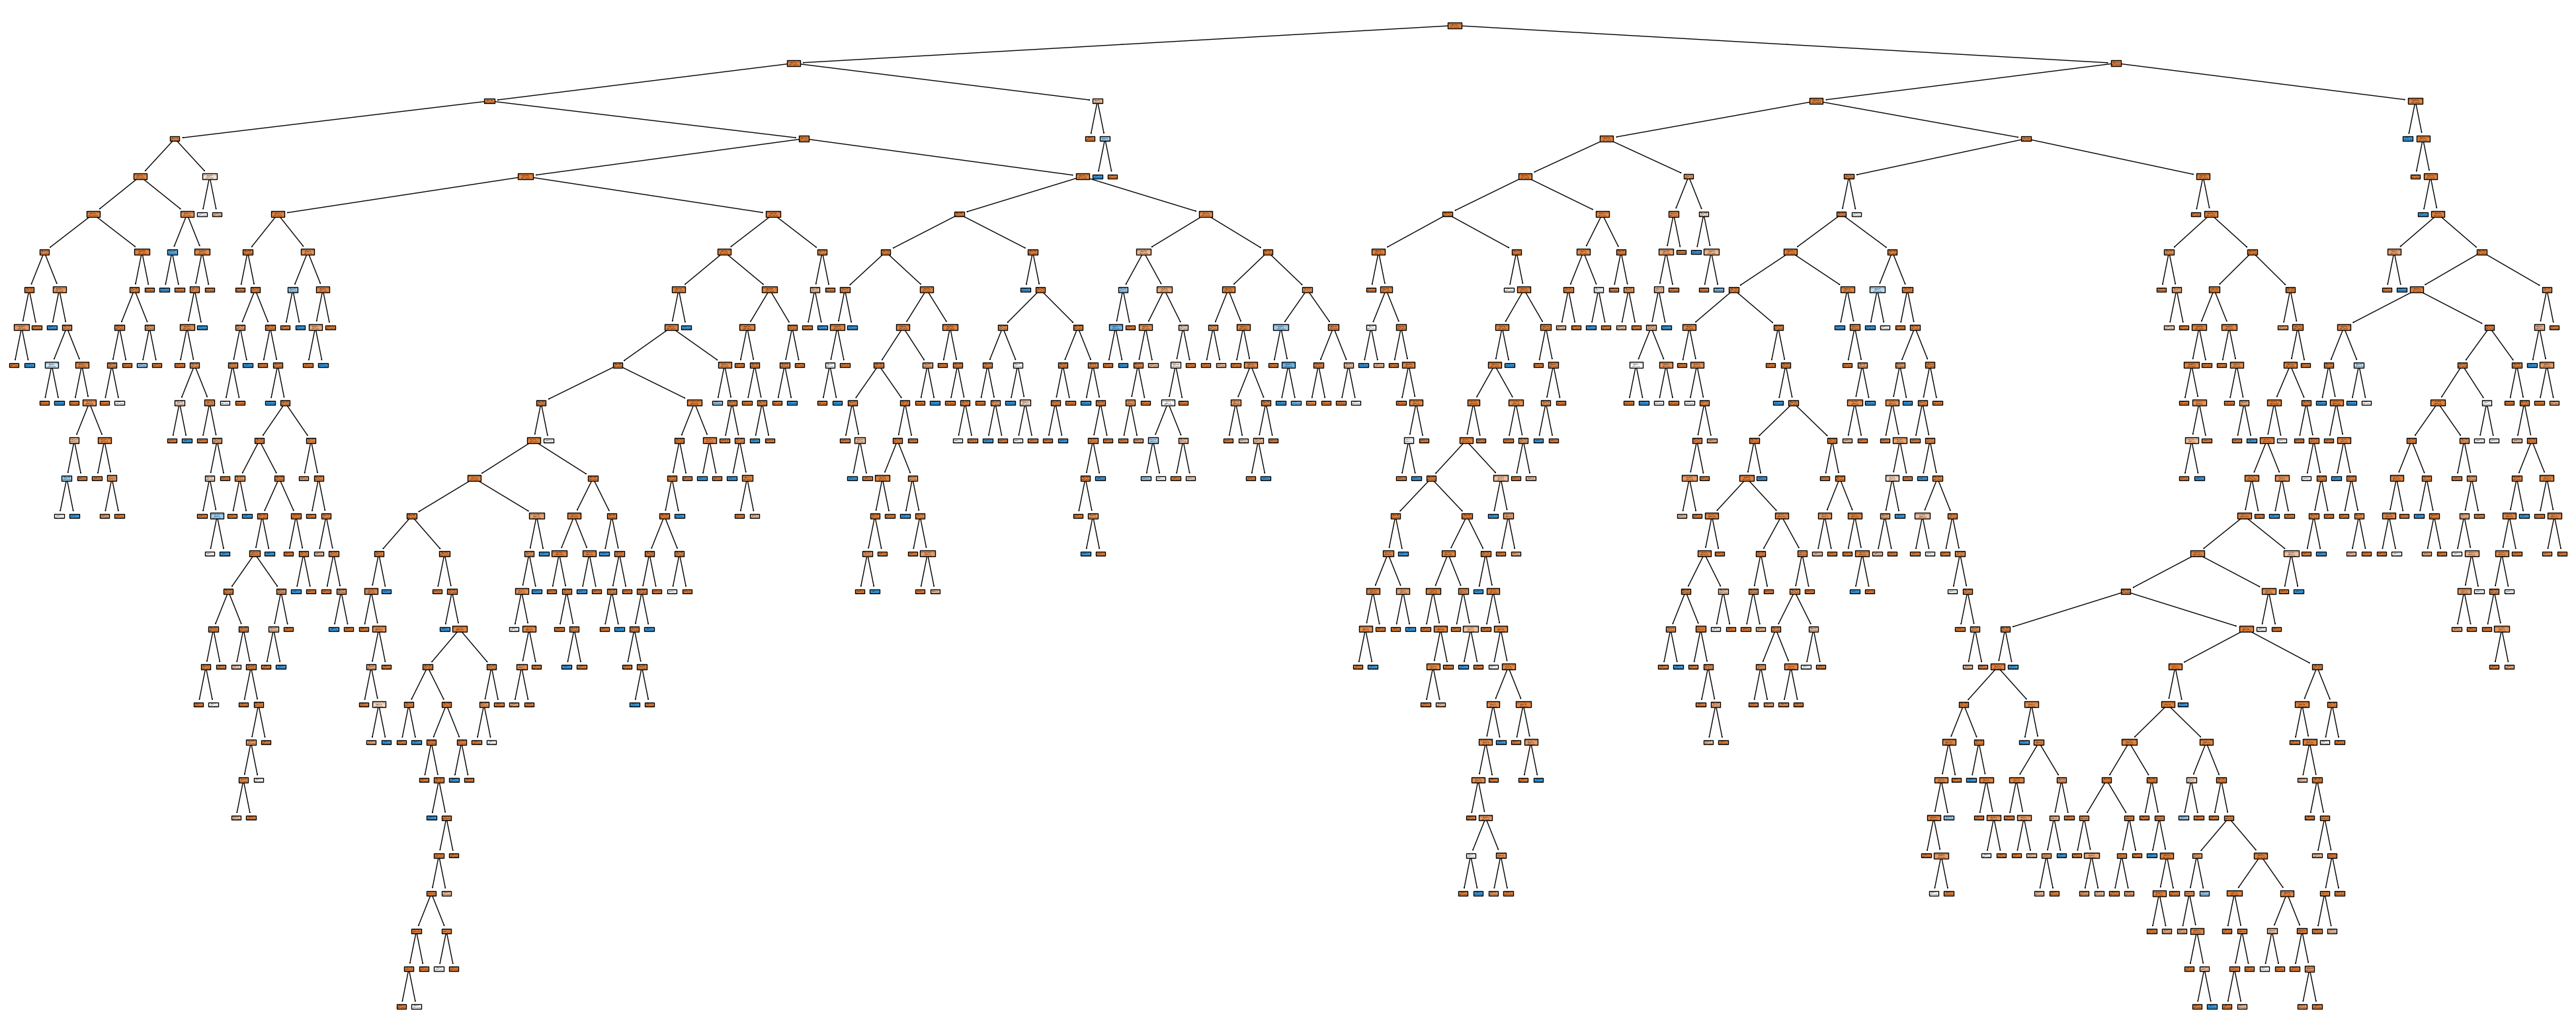

In [22]:
# Visualizar a árvore de decisão
plt.figure(figsize=(50, 20))
ames=X.columns, class_names=["aprovados", "reprovados"]);


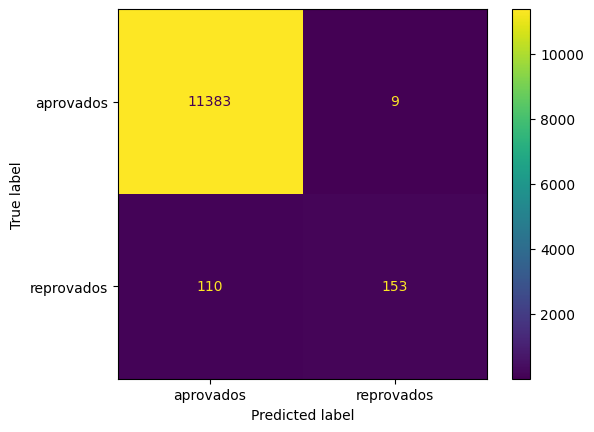

In [35]:
# Plot the confusion matrix
cm = confusion_matrix(y_train, clf.predict(X_train))

# Exiba a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot()
plt.show()

In [48]:
predict = clf.predict(X_train)
acuracia_treinamento = accuracy_score(y_train, predict)
print(f"Acurácia na base de treinamento: {acuracia_treinamento:.2f}")


Acurácia na base de treinamento: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [42]:
y_pred_test = clf.predict(X_val)


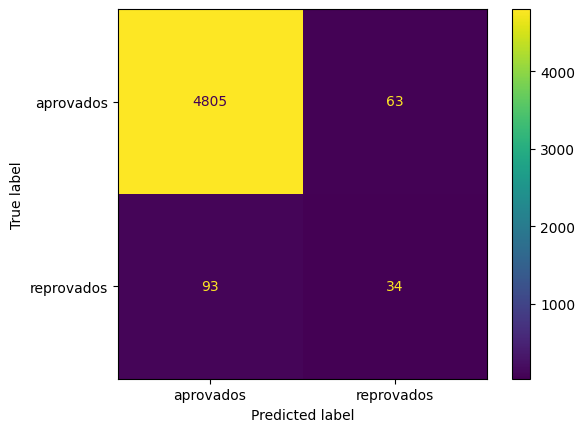

In [44]:
cm_test = confusion_matrix(y_val, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["aprovados", "reprovados"])
disp.plot()
plt.show()

In [49]:
predict_teste = clf.predict(X_val)
acuracia_teste = accuracy_score(y_val, predict_teste)
print(f"Acurácia na base de teste: {acuracia_teste:.2f}")

Acurácia na base de teste: 0.97


In [50]:
print(f"Acurácia na base de teste (modelo original): {acuracia_teste:.2f}")
print(f"Acurácia na base de treinamento (modelo original): {acuracia_treinamento:.2f}")

Acurácia na base de teste (modelo original): 0.97
Acurácia na base de treinamento (modelo original): 0.99


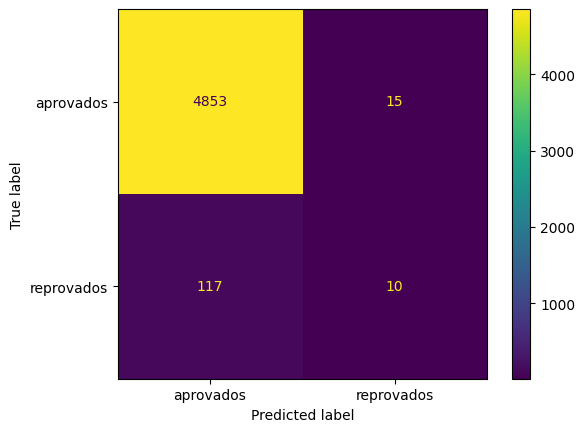

In [52]:
# Treinar uma nova árvore com restrições
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
nova_arvore.fit(X_train, y_train)

# Avaliar a nova árvore na base de teste
y_pred_nova = nova_arvore.predict(X_val)

# Matriz de confusão para a nova árvore
cm_nova = confusion_matrix(y_val, y_pred_nova)

# Exiba a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nova, display_labels=["aprovados", "reprovados"])
disp.plot()
plt.show()


In [53]:
# Proporção de "maus" classificados pela nova árvore
proporcao_maus = (y_pred_nova == 1).mean()
print(f"Proporção de 'maus' classificados pela nova árvore: {proporcao_maus:.2%}")

# Acurácia da nova árvore na base de teste
acuracia_nova_teste = accuracy_score(y_val, y_pred_nova)
print(f"Acurácia da nova árvore na base de teste: {acuracia_nova_teste:.2f}")

Proporção de 'maus' classificados pela nova árvore: 0.50%
Acurácia da nova árvore na base de teste: 0.97


In [54]:
# Acurácia assumindo todos como "bons"
acuracia_todos_bons = (y_val == 0).mean()
print(f"Acurácia classificando todos os contratos como 'bons': {acuracia_todos_bons:.2f}")

Acurácia classificando todos os contratos como 'bons': 0.97
